In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
# Load the dataset
hotel_bookings_data = pd.read_csv('/content/hotel_bookings.csv')
hotel_bookings_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Data Understanding and Preprocessing**




In [17]:
# Get the shape of the dataset (number of rows and columns)
rows, columns = hotel_bookings_data.shape
print(f"Number of rows:{rows}")
print(f"Number of columns:{columns}")

# Get data types of each column
print("\nData types of each column:")
print(hotel_bookings_data.dtypes)

# Get missing values count for each column
print("\nMissing values for each column:")
print(hotel_bookings_data.isnull().sum())

Number of rows:119390
Number of columns:32

Data types of each column:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
depos

In [18]:
# Fill missing values in 'children' with median value
hotel_bookings_data['children'].fillna(hotel_bookings_data['children'].median(), inplace=True)

# Calculate the mode of the 'country' column and Fill missing values in 'country' with mode
country_mode = hotel_bookings_data['country'].mode()[0]
hotel_bookings_data['country'].fillna(country_mode, inplace=True)

# Fill missing values in 'agent' with median value
hotel_bookings_data['agent'].fillna(hotel_bookings_data['agent'].median(), inplace=True)

# Convert 'company' column to string type and Fill missing values in 'company' with 'Unknown'
hotel_bookings_data['company'] = hotel_bookings_data['company'].astype(str)
hotel_bookings_data['company'].fillna('Unknown', inplace=True)

print(hotel_bookings_data.dtypes)


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [20]:
# Convert 'reservation_status_date' to datetime
hotel_bookings_data['reservation_status_date'] = pd.to_datetime(hotel_bookings_data['reservation_status_date'], format='%Y-%m-%d')

# Extract year, month, and day of week from 'reservation_status_date'
hotel_bookings_data['reservation_year'] = hotel_bookings_data['reservation_status_date'].dt.year
hotel_bookings_data['reservation_month'] = hotel_bookings_data['reservation_status_date'].dt.month
hotel_bookings_data['reservation_day_of_week'] = hotel_bookings_data['reservation_status_date'].dt.day_name()

# Create a feature indicating if the booking was made last minute (e.g., less than 30 days before arrival)
threshold =30
hotel_bookings_data['last_minute_booking'] = hotel_bookings_data['lead_time'] < threshold

# Create a feature for the total number of nights stayed
hotel_bookings_data['total_nights'] = hotel_bookings_data['stays_in_weekend_nights'] + hotel_bookings_data['stays_in_week_nights']

**Exploratory Data Analysis (EDA)**

<ipython-input-21-f91c7e9c3e2e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='viridis')


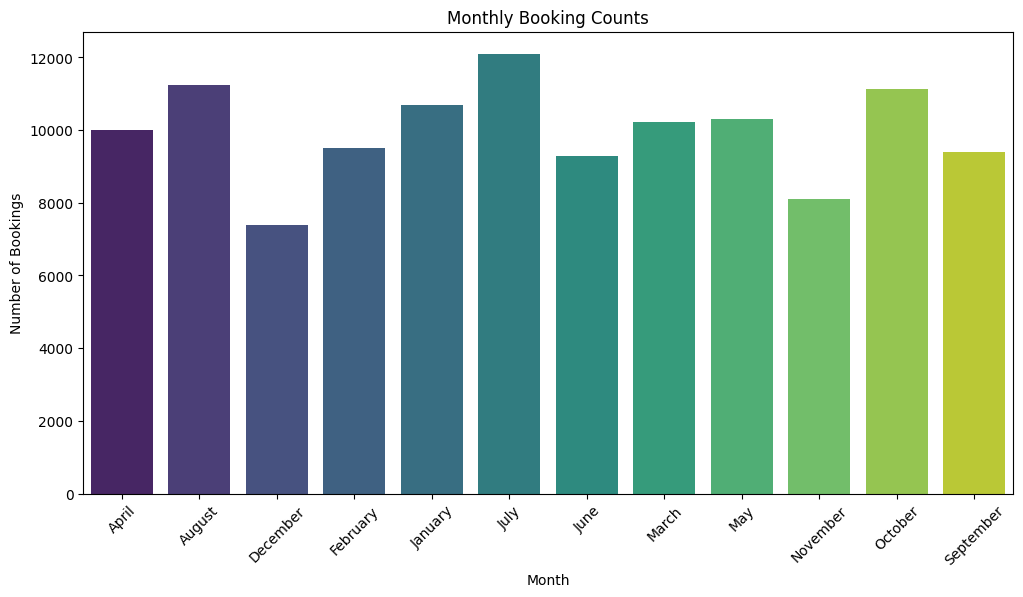

In [21]:
# Count of bookings per month
monthly_bookings = hotel_bookings_data.groupby('reservation_month').size()
monthly_bookings.index = pd.to_datetime(monthly_bookings.index, format='%m').strftime('%B')
monthly_bookings = monthly_bookings.sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='viridis')
plt.title('Monthly Booking Counts')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

<ipython-input-22-088130fe035e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hotel_type_counts.index, y=hotel_type_counts.values, palette='viridis')


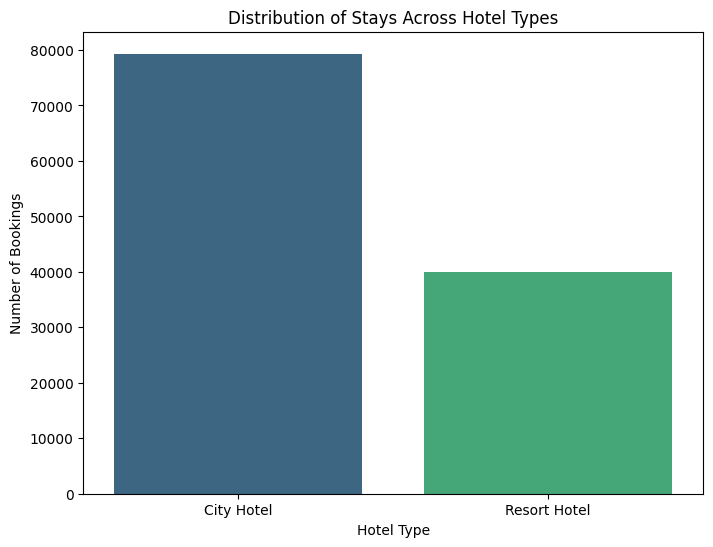

In [22]:
# Count of bookings per hotel type
hotel_type_counts = hotel_bookings_data['hotel'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=hotel_type_counts.index, y=hotel_type_counts.values, palette='viridis')
plt.title('Distribution of Stays Across Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

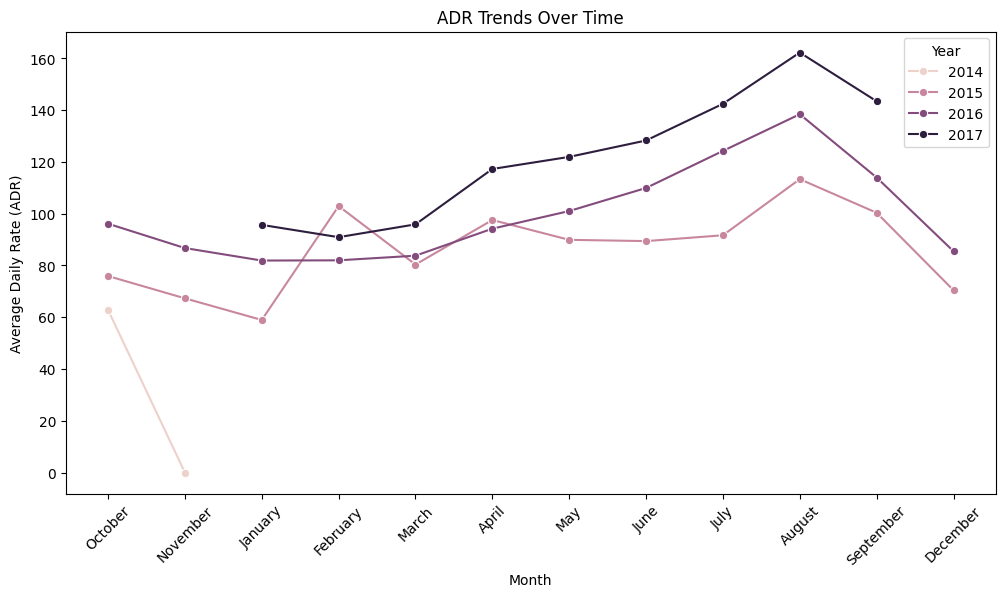

In [23]:
# Group by year and month to calculate average ADR
adr_trends = hotel_bookings_data.groupby(['reservation_year', 'reservation_month'])['adr'].mean().reset_index()
adr_trends['reservation_month'] = pd.to_datetime(adr_trends['reservation_month'], format='%m').dt.strftime('%B')

plt.figure(figsize=(12, 6))
sns.lineplot(x='reservation_month', y='adr', hue='reservation_year', data=adr_trends, marker='o')
plt.title('ADR Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()

<ipython-input-24-e7ad8d3855c4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_by_month.index, y=cancellation_by_month.values, palette='viridis')


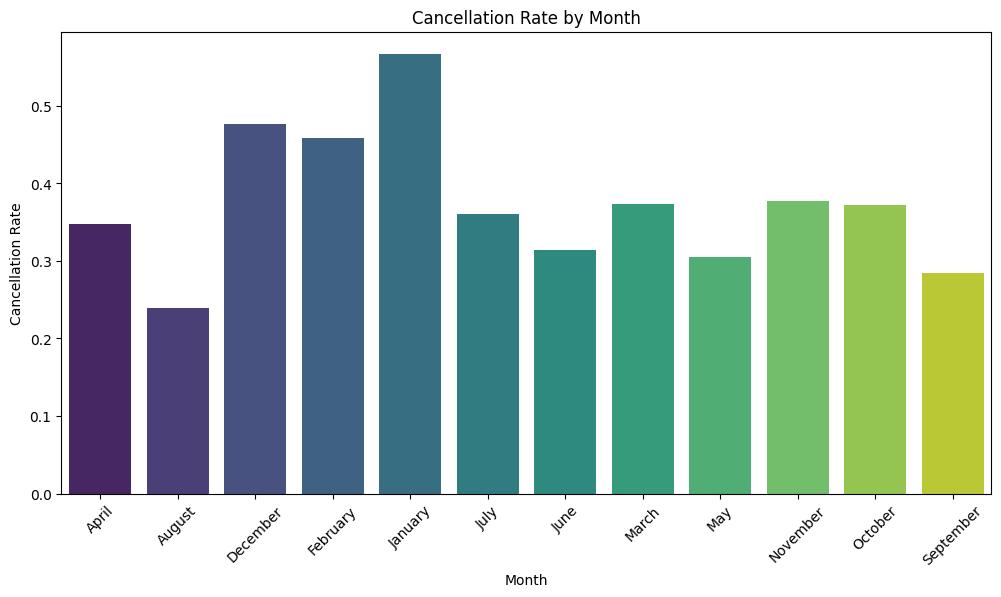

<ipython-input-24-e7ad8d3855c4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_by_hotel.index, y=cancellation_by_hotel.values, palette='viridis')


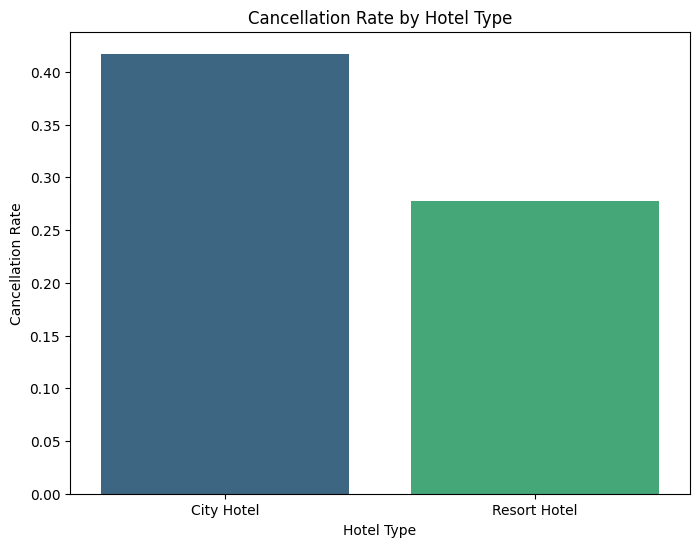

<ipython-input-24-e7ad8d3855c4>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_by_market_segment.index, y=cancellation_by_market_segment.values, palette='viridis')


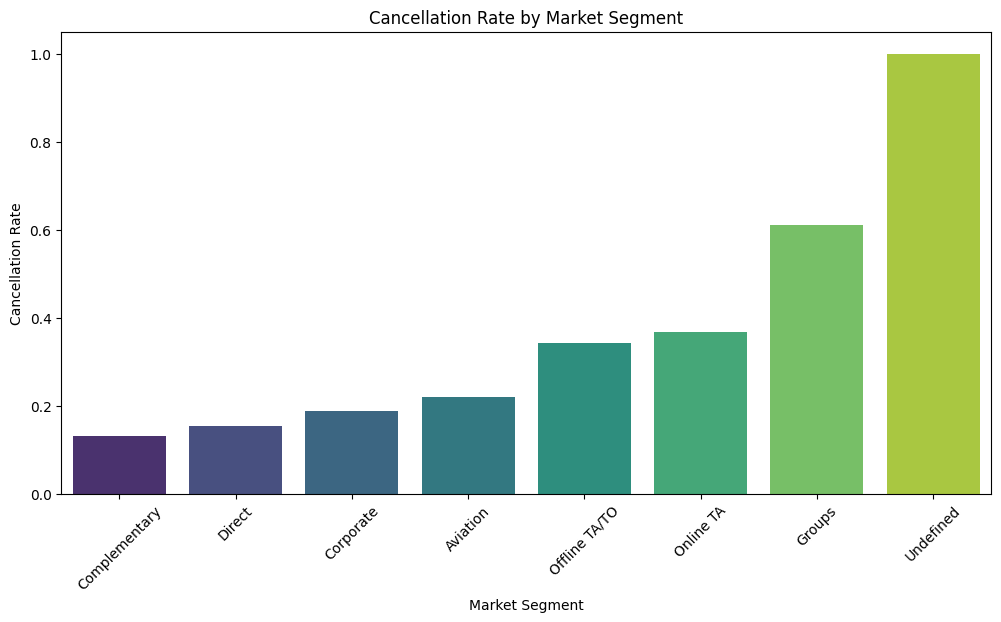

In [24]:
# Cancellation rate by month
cancellation_by_month = hotel_bookings_data.groupby('reservation_month')['is_canceled'].mean()
cancellation_by_month.index = pd.to_datetime(cancellation_by_month.index, format='%m').strftime('%B')
cancellation_by_month = cancellation_by_month.sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_by_month.index, y=cancellation_by_month.values, palette='viridis')
plt.title('Cancellation Rate by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

# Cancellation rate by hotel type
cancellation_by_hotel = hotel_bookings_data.groupby('hotel')['is_canceled'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=cancellation_by_hotel.index, y=cancellation_by_hotel.values, palette='viridis')
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()

# Cancellation rates based on booking source
cancellation_by_market_segment = hotel_bookings_data.groupby('market_segment')['is_canceled'].mean()
cancellation_by_market_segment = cancellation_by_market_segment.sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_by_market_segment.index, y=cancellation_by_market_segment.values, palette='viridis')
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()


In [25]:
# Define groups based on lead time
hotel_bookings_data['long_advance_booking'] =  hotel_bookings_data['lead_time'] > 180

# Calculate cancellation rates
cancellation_rates = hotel_bookings_data.groupby('long_advance_booking')['is_canceled'].mean()

# Perform a t-test to compare means
cancellation_rates_data = hotel_bookings_data[['long_advance_booking','is_canceled']]
group1 = cancellation_rates_data[cancellation_rates_data['long_advance_booking'] == True]['is_canceled']
group1 = cancellation_rates_data[cancellation_rates_data['long_advance_booking'] == False]['is_canceled']

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f"Cancellation Rate for Long Advance Booking: {cancellation_rates[True]:4f}")
print(f"Cancellation Rate for Long Advance Booking: {cancellation_rates[False]:4f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value <0.05:
      print("Reject the null hypothesis: There is a significant difference in cancellation rates based on booking advance time.")
else:
      print("Fail to reject the null hypothesis: There is no significant difference in cancellation rates based on booking advance time.")



NameError: name 'group2' is not defined

In [26]:
# Define weekdays and weekends
hotel_bookings_data['is_weekend'] = hotel_bookings_data['reservation_day_of_week'].isin(['Saturday','Sunday'])
adr_mean = hotel_bookings_data.groupby('is_weekend')['adr'].mean()

# Perform a t-test to compare means
adr_data = hotel_bookings_data[['is_weekend', 'adr']]
group1 = adr_data[adr_data['is_weekend'] == True]['adr']
group2 = adr_data[adr_data['is_weekend'] == False]['adr']

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f"Average ADR for Weekends: {adr_mean[True]:.2f}")
print(f"Average ADR for Weekdays: {adr_mean[False]:.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in ADR between weekend and weekday bookings.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ADR between weekend and weekday bookings.")

Average ADR for Weekends: 105.72
Average ADR for Weekdays: 100.56
T-Statistic: 15.2510
P-Value: 0.0000
Reject the null hypothesis: There is a significant difference in ADR between weekend and weekday bookings.


In [27]:
# Define features and target variable
X = hotel_bookings_data.drop(columns=['is_canceled','reservation_status_date'])
y = hotel_bookings_data['is_canceled']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and test sets (split)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Define a function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\n")

# Print metrics for Logistic Regression
print_evaluation_metrics(y_test, y_pred_log_reg, "Logistic Regression")

# Print metrics for Random Forest
print_evaluation_metrics(y_test, y_pred_random_forest, "Random Forest")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation Metrics for Logistic Regression:
Accuracy: 0.9999
Precision: 0.9997
Recall: 1.0000
F1-Score: 0.9998


Evaluation Metrics for Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9999
F1-Score: 0.9999


